## 用决策树分析鸢尾花数据

###### 决策树是一种分类算法，算法过程中使用信息熵Entropy来度量一个系统的失序现象，也就是通过计算系统的混乱程度来进行决策分类
###### entropy = sum(-plog(p,2)),在p等于0.5时，信息熵最大，表明数据最没有趋势，越无法决策。因此信息上越小，越有利于决策。
###### 除了信息熵，还有一种度量系统失序现象程度的方法是Gini系数，Gini = 1 - sum(pj^2)
###### 首先求出决策目标的基尼系数或信息熵，这个结果可能还没法进行决策，因此一步步加入条件，例如加入天气添加辅助决策是否需要去打高尔夫。
###### 这样可以求得加入天气条件后系统的信息熵，用这个信息熵减去决策目标的信息熵即为信息增益Information Gain。通常在选分支属性的时候选择信息增益
###### 最大的属性用做分支，Gain(T,X) = Entropy(T)-Entropy(T,X)
###### T为决策目标信息熵，X为加入条件，Entropy（T，X）为在拥有决策目标的情况下，求得的辅助属性X的信息熵

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [7]:
data = iris.data
target = iris.target

In [9]:
type(data)

numpy.ndarray

In [10]:
type(target)

numpy.ndarray

In [76]:
#使用决策树建立分类模型
from sklearn import tree
#可以通过max_depth设置树的最大深度
dtc = tree.DecisionTreeClassifier(max_depth=2)
#喂数据
dtc.fit(data,target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [77]:
#pridict方法做预测
dtc.predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [78]:
dtc.predict(data)-target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [79]:
#结果显示，全部预测正确


In [80]:
#将结果保存为树
tree.export_graphviz(dtc,"tree.dot")

###### 安装graphviz-2.38.1401953780 for windows
###### 进入tree.dot所在目录
###### 输入命令： dot -T png tree.dot -o tree.png
###### 运行完成之后可以在 tree.dot目录下看到tree.png图片

#### 在jupyter中加载tree.png图片

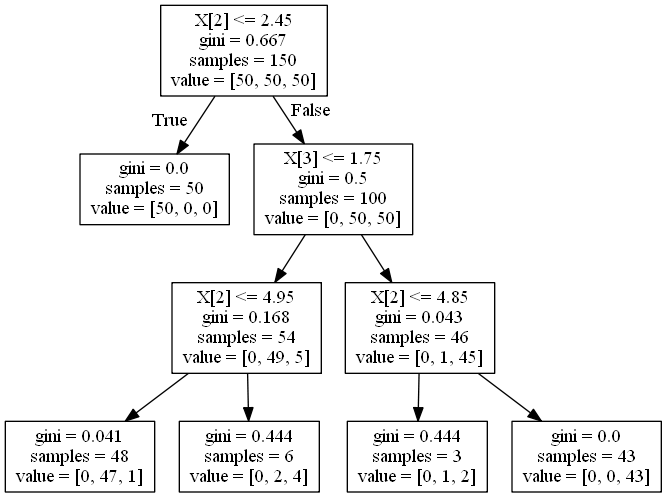

In [1]:
from IPython.display import Image
Image("tree.png")

In [82]:
data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [83]:
a = dtc.predict([[6.2,  3.4,  5.4,  2.3]])

In [84]:
a[0]

2

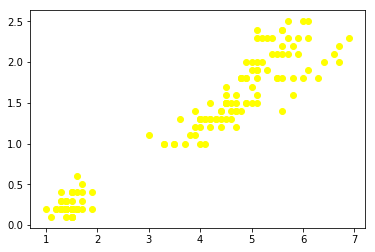

In [85]:
##绘图
import matplotlib.pyplot as plt
#取花瓣petal的长度和宽度
plt.scatter(data[:,2],data[:,3],color="yellow")
plt.show()

In [2]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn. datasets import load_iris
from sklearn import tree

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X, y)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

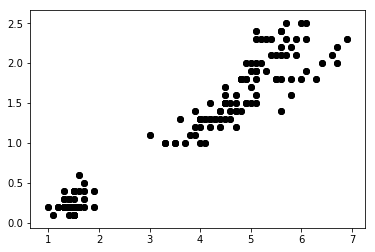

In [4]:
plt.scatter(X[:,0],X[:,1],color="black")
plt.show()

In [6]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

In [7]:
xx.ravel()

array([ 0. ,  0.1,  0.2, ...,  7.6,  7.7,  7.8])

In [8]:
yy.ravel()

array([-0.9, -0.9, -0.9, ...,  3.4,  3.4,  3.4])

In [9]:
res = np.c_[xx.ravel(),yy.ravel()]
res.shape

(3476, 2)

In [10]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
len(Z)
#xx.shape
Z = Z.reshape(xx.shape)
Z.shape

(44, 79)

In [11]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

In [12]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
len(Z)
#xx.shape
Z = Z.reshape(xx.shape)
Z.shape

(44, 79)

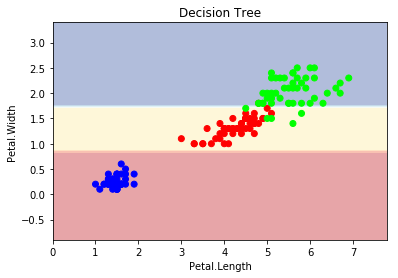

In [13]:
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y,  cmap = plt.cm.brg)
plt.title('Decision Tree')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()